In [33]:
''' Normalize node-node communication delay matrix'''


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import random

from concurrent.futures import ThreadPoolExecutor
from multiprocessing import Pool
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

In [34]:
def generate_delay_matrix(num_nodes, base_latency, max_additional_latency):
    delay_matrix = [[0 for _ in range(num_nodes)] for _ in range(num_nodes)]
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                additional_latency = random.uniform(0, max_additional_latency)
                distance_factor = abs(i - j) / num_nodes
                simulated_latency = base_latency + additional_latency * distance_factor
                congestion_factor = random.uniform(0.5, 1.5)
                delay_matrix[i][j] = int(simulated_latency * congestion_factor)
    return delay_matrix

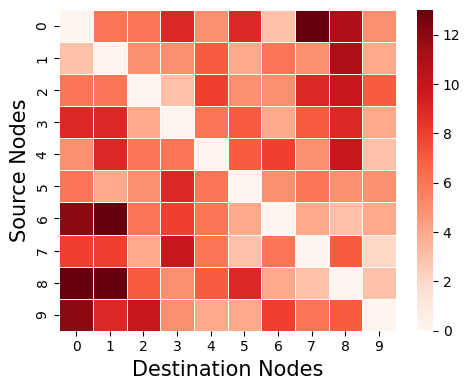

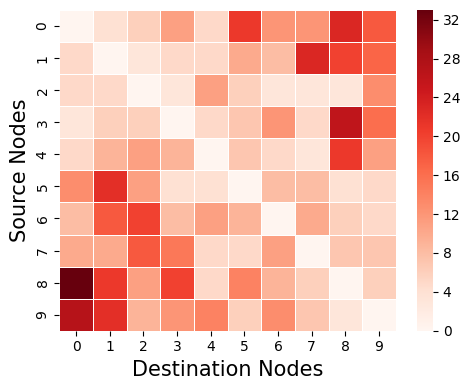

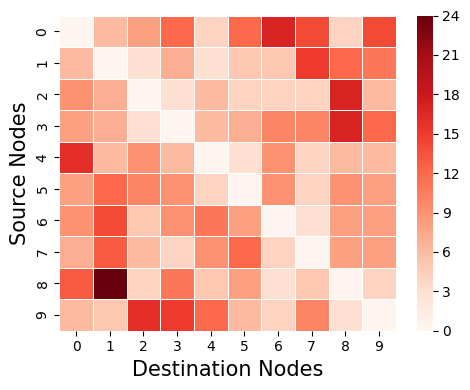

In [ ]:
num_nodes_list = [5,10, 15]
# total_time = 40 # 40 mins

def latency_tasks_diff_nodes(num_nodes:int):
    # dealy_matrix0 = generate_delay_matrix(num_nodes, 0, 0)
    delay_matrix1= generate_delay_matrix(num_nodes, 5, 10)
    delay_matrix2 = generate_delay_matrix(num_nodes, 5, 30)
    delay_matrix3 = generate_delay_matrix(num_nodes, 5, 20)
    
    # delay_matrix = [dealy_matrix0,delay_matrix1, delay_matrix2, delay_matrix3]
    delay_matrix = [delay_matrix1, delay_matrix2, delay_matrix3]

    return delay_matrix
    
Matrix = latency_tasks_diff_nodes(num_nodes_list[1])
for mat in Matrix:
    df = pd.DataFrame(mat).T.astype(int)         # cast to int for clean ticks
    np.fill_diagonal(df.values, 0)               # zero self-latency 

    plt.figure(figsize=(5, 4))
    ax = sns.heatmap(
        df,
        cmap="Reds",
        linewidths=.5,
        xticklabels=True,
        yticklabels=True,
        cbar_kws={                       # colour-bar options
            "ticks": np.arange(0, df.values.max() + 1, 5),  # step = 2; adjust as you like
            "format": "%d"                                   # integer tick labels
        }
    )

    # guarantee integer-only ticks even if data range / step changes
    cbar = ax.collections[0].colorbar
    cbar.ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter("%d"))

    ax.set_xlabel("Destination Nodes", fontsize=15)
    ax.set_ylabel("Source Nodes", fontsize=15)
    plt.tight_layout()
    plt.show()


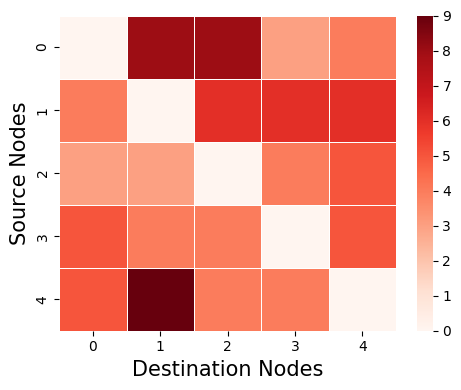

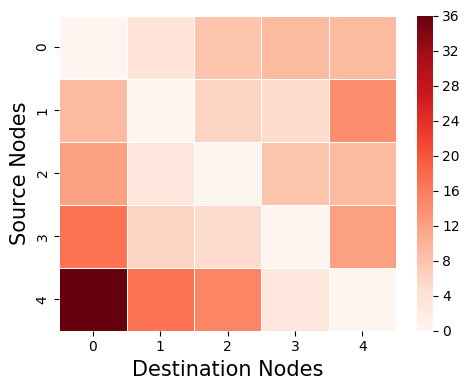

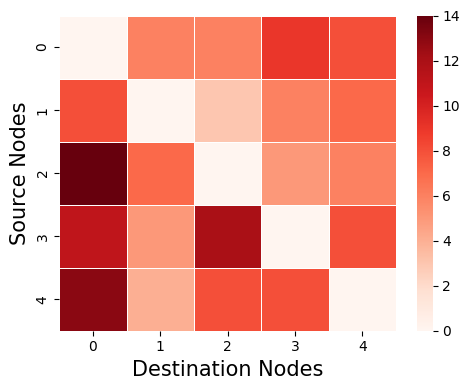

In [36]:
Matrix = latency_tasks_diff_nodes(num_nodes_list[0]) # 5Nodes Delay
for mat in Matrix:
    df = pd.DataFrame(mat).T.astype(int)         # cast to int for clean ticks
    np.fill_diagonal(df.values, 0)               # zero self-latency 

    plt.figure(figsize=(5, 4))
    ax = sns.heatmap(
        df,
        cmap="Reds",
        linewidths=.5,
        xticklabels=True,
        yticklabels=True,
        cbar_kws={                       # colour-bar options
            "ticks": np.arange(0, df.values.max() + 1, 5),  # step = 2; adjust as you like
            "format": "%d"                                   # integer tick labels
        }
    )

    # guarantee integer-only ticks even if data range / step changes
    cbar = ax.collections[0].colorbar
    cbar.ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter("%d"))

    ax.set_xlabel("Destination Nodes", fontsize=15)
    ax.set_ylabel("Source Nodes", fontsize=15)
    plt.tight_layout()
    plt.show()


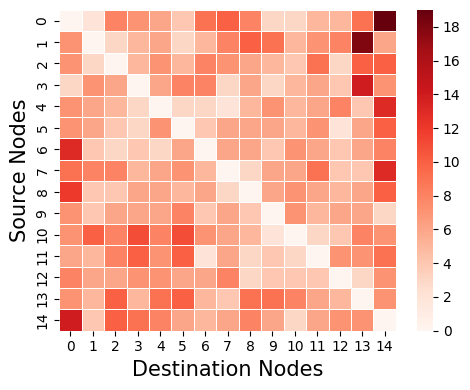

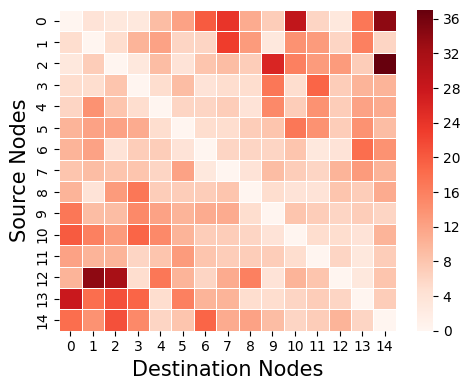

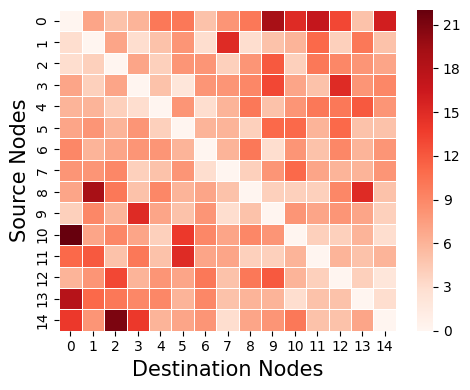

In [37]:
Matrix = latency_tasks_diff_nodes(num_nodes_list[2]) # 15 nodes cross-node delay
for mat in Matrix:
    df = pd.DataFrame(mat).T.astype(int)         # cast to int for clean ticks
    np.fill_diagonal(df.values, 0)               # zero self-latency 

    plt.figure(figsize=(5, 4))
    ax = sns.heatmap(
        df,
        cmap="Reds",
        linewidths=.5,
        xticklabels=True,
        yticklabels=True,
        cbar_kws={                       # colour-bar options
            "ticks": np.arange(0, df.values.max() + 1, 5),  # step = 2; adjust as you like
            "format": "%d"                                   # integer tick labels
        }
    )

    # guarantee integer-only ticks even if data range / step changes
    cbar = ax.collections[0].colorbar
    cbar.ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter("%d"))

    ax.set_xlabel("Destination Nodes", fontsize=15)
    ax.set_ylabel("Source Nodes", fontsize=15)
    plt.tight_layout()
    plt.show()


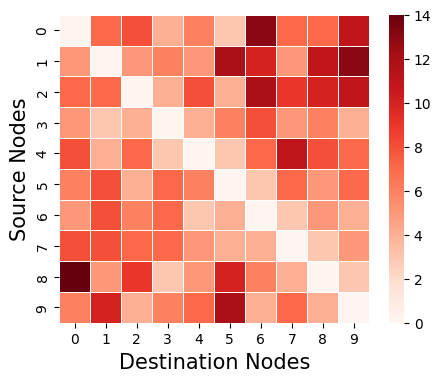

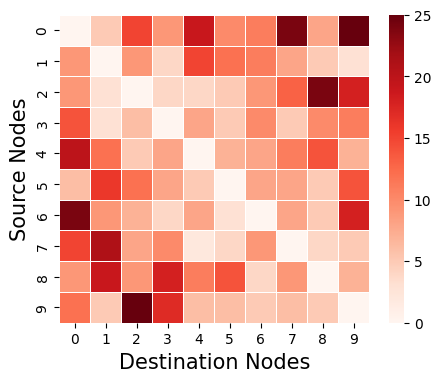

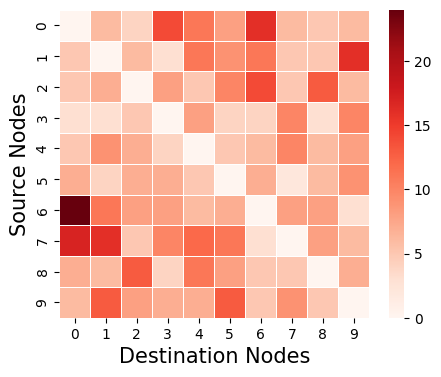

In [24]:
Matrix = latency_tasks_diff_nodes(num_nodes_list[1])

for i in range(len(Matrix)):
    df = pd.DataFrame(Matrix[i]).T
# Fill diagonal with 0's for self-latency (optional, if desired for clarity)
    for worker in df.columns:
        df.at[worker, worker] = 0

    # Normalize the DataFrame
    max_latency = df.max().max()  # Find the maximum value in the DataFrame
    normalized_df = df / max_latency  # Divide every element by the maximum value

    # Plot the normalized matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(df,  cmap= "Reds",xticklabels=True, fmt=".1f", yticklabels=True, linewidths=.5)

    # sns.heatmap(df, annot=True,  cmap= "Reds",fmt=".1f", annot_kws={'size': 8},xticklabels=True, yticklabels=True, linewidths=.5)
    # plt.title('Normalized Latency Matrix')
    plt.xlabel('Destination Nodes', fontsize=15)
    plt.ylabel('Source Nodes', fontsize=15)
    plt.show()

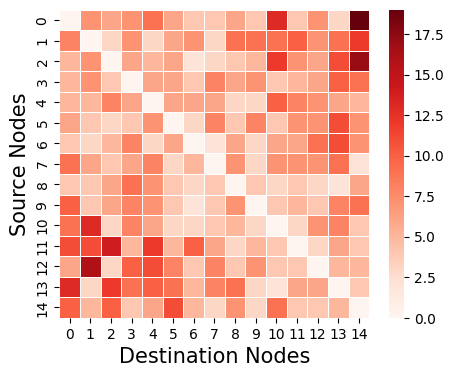

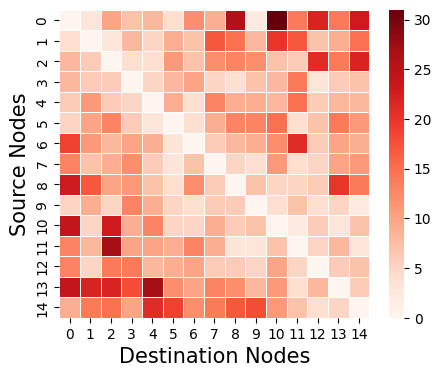

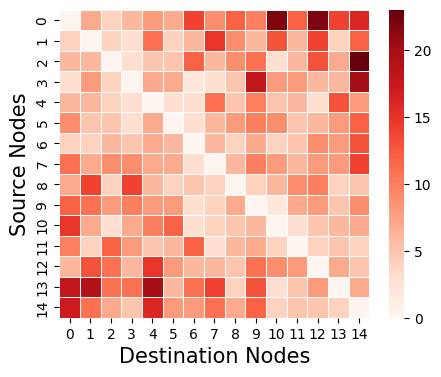

In [26]:
Martix = latecy_tasks_diff_nodes(num_nodes_list[2])

for i in range(len(Martix)):
    df = pd.DataFrame(Martix[i]).T
# Fill diagonal with 0's for self-latency (optional, if desired for clarity)
    for worker in df.columns:
        df.at[worker, worker] = 0

    # Normalize the DataFrame
    max_latency = df.max().max()  # Find the maximum value in the DataFrame
    normalized_df = df / max_latency  # Divide every element by the maximum value

    # Plot the normalized matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(df,  cmap= "Reds",xticklabels=True, fmt=".1f", yticklabels=True, linewidths=.5)

    # sns.heatmap(df, annot=True,  cmap= "Reds",fmt=".1f", annot_kws={'size': 8},xticklabels=True, yticklabels=True, linewidths=.5)
    # plt.title('Normalized Latency Matrix')
    plt.xlabel('Destination Nodes', fontsize=15)
    plt.ylabel('Source Nodes', fontsize=15)
    plt.show()

In [ ]:
# Convert the  dictionary into a pandas DataFrame and transpose it
df = pd.DataFrame(latency_results).T

# Mapping old names to new names
worker_node = {
    'k8s-worker-1': 'node-1', 'k8s-worker-2': 'node-2', 'k8s-worker-3': 'node-3',
    'k8s-worker-4': 'node-4', 'k8s-worker-5': 'node-5', 'k8s-worker-6': 'node-6',
    'k8s-worker-7': 'node-7', 'k8s-worker-8': 'node-8', 'k8s-worker-9': 'node-9'
}

# Rename the columns and index according to the dictionary
df.rename(columns=worker_node, index=worker_node, inplace=True)

# Fill diagonal with 0's for self-latency (optional, if desired for clarity)
for worker in df.columns:
    df.at[worker, worker] = 0

# Normalize the DataFrame
max_latency = df.max().max()  # Find the maximum value in the DataFrame
normalized_df = df / max_latency  # Divide every element by the maximum value

# Plot the normalized matrix
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_df, annot=True,  cmap= "Reds",fmt=".2f", annot_kws={'size': 12},xticklabels=True, yticklabels=True, linewidths=.5)
# plt.title('Normalized Latency Matrix')
plt.xlabel('Destination Nodes', fontsize=15)
plt.ylabel('Source Nodes', fontsize=15)
plt.show()